In [1]:
# Zadanie 1 - pobierz zbiór i podziel
import pandas as pd
import numpy as np

X_train = pd.read_csv("Train\X_train.txt")
X_train = X_train.iloc[:,0].str.split(' ', expand=True)
X_train = X_train.astype(float)
X_test = pd.read_csv("Test\X_test.txt")
X_test = X_test.iloc[:,0].str.split(' ', expand=True)
X_test = X_test.astype(float)
y_train = pd.read_csv("Train\y_train.txt")
y_train = y_train.astype(int)
#y_train = y_train.iloc[:,0].str.split(' ', expand=True)

y_test = pd.read_csv("Test\y_test.txt")
y_test = y_test.astype(int)
#y_test = y_test.iloc[:, 0].str.split(' ', expand=True)

y_test.columns = ['Class']
y_train.columns = ['Class']
train_dataset = ""
test_dataset =""
train_dataset = X_train
train_dataset['Class'] = pd.Series(y_train.values.tolist())
train_dataset['Class'] = [','.join(map(str, l)) for l in train_dataset['Class']]
#train_dataset['Class'] = train_dataset['Class'].str.replace(']','')
test_dataset = X_test
test_dataset['Class'] = pd.Series(y_train.values.tolist())
test_dataset['Class'] = [','.join(map(str, l)) for l in test_dataset['Class']]
train_dataset['Class'] = pd.to_numeric(train_dataset['Class'])
test_dataset['Class'] = pd.to_numeric(test_dataset['Class'])
dataset = pd.concat([train_dataset, test_dataset])

In [2]:
#Zadanie 2
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import cross_val_score

# dla 10 komponentow
x = dataset.iloc[:, :560].values
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
print(np.mean(x),np.std(x))
pca = PCA(n_components=10)
shrinked_dataset = pca.fit_transform(x)
split = int(x.shape[0] * 0.4)
X_train = x[:split,:]
X_test = x[split:,:]
y_train = dataset.iloc[:split,-1].values
y_test = dataset.iloc[split:,-1].values
clf = svm.SVC(kernel='linear').fit(X_train, y_train)
from datetime import datetime
t0 = datetime.now()
scores = cross_val_score(clf, X_test, y_test, cv=5, n_jobs=-1, verbose=5)
t1 = datetime.now()
first = t1-t0
print("Czas sprawdzianu krzyżowego dla klasyfikatora SVM, cv=5, przed redukcją wymiarowości to:",first)
X_train_shrinked = shrinked_dataset[:split,:]
X_test_shrinked = shrinked_dataset[split:,:]
clf = svm.SVC(kernel='linear').fit(X_train_shrinked,y_train)
t0 = datetime.now()
scores_shrinked = cross_val_score(clf, X_test_shrinked, y_test, cv=5, n_jobs=-1, verbose=5)
t1 = datetime.now()
second = t1-t0
print("Czas sprawdzianu krzyżowego dla klasyfikatora SVM, cv=5, przed redukcją wymiarowości to:",second)

[[ 0.03948004 -0.00213128 -0.02906736 ...  0.70351059 -0.8450924
   0.18026111]
 [ 0.03997778 -0.00515272 -0.02265071 ...  0.80852908 -0.84923013
   0.18060956]
 [ 0.03978456 -0.01180878 -0.02891578 ... -0.48536645 -0.84894659
   0.18190709]
 ...
 [ 0.06833377  0.04382217 -0.02413471 ...  0.36313871 -0.65603364
   0.27445701]
 [ 0.02301605  0.03234511 -0.01182959 ... -0.00839825 -0.66038682
   0.26475922]
 [-0.0108462  -0.00413392 -0.03767837 ... -0.02496514 -0.66074775
   0.26391374]]
-1.4561253752878938e-18 1.0000000000000002
[[-15.79880597   1.86980396  -0.52170093 ...   0.24096985  -1.0083585
   -0.07859983]
 [-15.6504064    2.99024605  -1.33388494 ...   0.77049936  -0.59881269
   -0.73634062]
 [-15.90901371   4.34853411  -0.64772131 ...   1.06117546  -1.10983833
   -1.79857797]
 ...
 [ 11.19868083  -2.31533474  -0.14680066 ...   1.0890594   -0.72555854
   -0.19808087]
 [  7.67751601  -2.64458186  -1.96889411 ...   1.42728847  -0.74790569
    0.29676779]
 [  8.70246898  -2.24151594

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


Czas sprawdzianu krzyżowego dla klasyfikatora SVM, cv=5, przed redukcją wymiarowości to: 0:01:37.986265
(4370, 560)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.6s remaining:   23.5s


Czas sprawdzianu krzyżowego dla klasyfikatora SVM, cv=5, przed redukcją wymiarowości to: 0:00:28.751626


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s finished


In [3]:
#Zadanie 2 - Zapis do pliku
import openpyxl
from openpyxl import Workbook
wb = Workbook()
ws = wb.active
ws.merge_cells("A1:D1")
ws["A1"] = "Wyniki klasyfikacji SVM z redukcją wymiarowości i bez redukcji"
ws.merge_cells('A2:B2')
ws['A2'] = "Czas przetwarzania"
ws.merge_cells('C2:D2')
ws['C2'] = "Wyniki sprawdzianu krzyżowego"
ws['A3'] = "Przed redukcją"
ws['B3'] = "Po redukcji"
ws['C3'] = "Przed redukcją"
ws['D3'] = "Po redukcji"
ws['A4'] = first
ws['B4'] = second
for i in range(len(scores)):
    ws["C"+str(4+i)] = scores[i]
    ws["D"+str(4+i)] = scores_shrinked[i]

wb.save("dim_reduction.xlsx")

In [4]:
#Zadanie 3
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

classifiers = [MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), max_iter=10000),
              RandomForestClassifier(max_depth=7, n_estimators=50,max_features=2),
              GaussianNB(),
              KNeighborsClassifier(6)]
names = ["MLP", "Losowy Las Decyzyjny", "Gaussowski Naiwny Bayes", "KNN"]
print("Do zespołu wybieram:",names)
ensemble = VotingClassifier(estimators=[(names[0],classifiers[0]),
                                       (names[1],classifiers[1]),
                                       (names[2],classifiers[2]),
                                       (names[3],classifiers[3])],voting='soft', weights=[0.3,0.3,0.2,0.2])

ensemble.fit(X_train_shrinked,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score

print("Wyniki dla zespołu klasyfikacyjnego")
encoded_features = pd.get_dummies(y_test)
y_pred = ensemble.predict(X_test_shrinked)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Wyniki:")
print("ACC = ",acc)
print("Recall = ",recall)
print("F1 = ",f1)
fpr = {}
tpr = {}
thresh = {}
n_class = len(np.unique(y_train))
y_pred_proba = ensemble.predict_proba(X_test_shrinked)
auc_scores = []
for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
        auc_score = roc_auc_score(encoded_features.iloc[:,i], y_pred_proba[:,i],multi_class='ovr', average='macro')
        print("AUC dla klasy ",i,":", auc_score)
        auc_scores.append(auc_score)
# roc_auc_score = cross_val_score(ensemble, X_test_shrinked, y_test, cv=3, scoring='roc_auc')
# print("ROC AUC = ", roc_auc_score)

Do zespołu wybieram: ['MLP', 'Losowy Las Decyzyjny', 'Gaussowski Naiwny Bayes', 'KNN']
Wyniki dla zespołu klasyfikacyjnego
Wyniki:
ACC =  0.4720146408418484
Recall =  0.34216780527325313
F1 =  0.34765046183753373
AUC dla klasy  0 : 0.733835239322878
AUC dla klasy  1 : 0.7085640918817292
AUC dla klasy  2 : 0.7121803266369111
AUC dla klasy  3 : 0.7131127089309415
AUC dla klasy  4 : 0.7193317891792674
AUC dla klasy  5 : 0.7292309044041329
AUC dla klasy  6 : 0.7334965338603662
AUC dla klasy  7 : 0.7154771296549725
AUC dla klasy  8 : 0.7073855979516402
AUC dla klasy  9 : 0.7233906777216111
AUC dla klasy  10 : 0.6735522145121219
AUC dla klasy  11 : 0.6766624417473243


c:\users\kucht\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


In [5]:
#ZADANIE 3 - zapis do pliku
import openpyxl
from openpyxl import Workbook
wb = Workbook()
ws = wb.active
ws.merge_cells("A1:D1")
ws["A1"] = "Wyniki klasyfikacji zespołu"
ws['A2'] = "ACC"
ws['B2'] = acc
ws['A3'] = "Recall"
ws['B3'] = recall
ws['A4'] = "F1"
ws['B4'] = f1
ws.merge_cells("A5:B5")
ws["A5"] = "Wyniki AUC dla poszczegolnych klas"
for i in range(n_class):
    ws["A"+str(6+i)] = i
    ws["B"+str(6+i)] = auc_scores[i]

wb.save("ensambled_learning.xlsx")

-19.1499773201922 53.587574180337704
-31.42508763054038 26.18200965212531


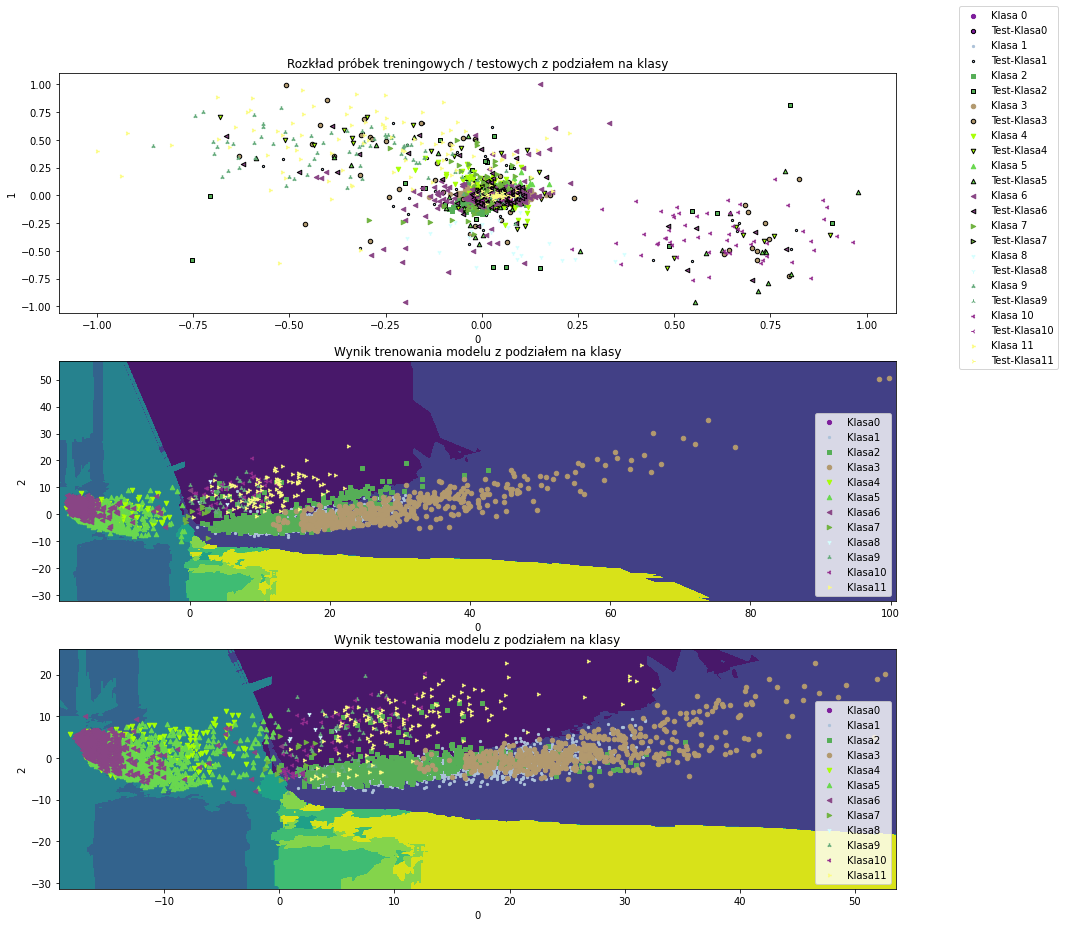

In [27]:
#ZADANIE 4 - wynik klasyfikacji i testowania zespolowego

import matplotlib.pyplot as plt
import matplotlib.markers as markers
import matplotlib.colors as colors


mrks = list(markers.MarkerStyle.markers.keys())[0:n_class]
clrs = list(colors.XKCD_COLORS.keys())
plot_step = 0.05
ensemble.fit(X_train_shrinked[:,:2],y_train)

train_predicted = ensemble.predict(X_train_shrinked[:,:2])
train_shrinked_df = pd.DataFrame(X_train_shrinked)
train_shrinked_df['Class'] = pd.Series(train_predicted.tolist())
# train = pd.concat([X_train_shrinked, train_predicted])

test_predicted = ensemble.predict(X_test_shrinked[:,:2])
test_shrinked_df = pd.DataFrame(X_test_shrinked)
test_shrinked_df['Class'] = pd.Series(test_predicted.tolist())

# test = pd.concat([X_test_shrinked, test_predicted])               )
x_min, x_max = float(train_shrinked_df.iloc[:, 0].min()) - 1, float(train_shrinked_df.iloc[:, 0].max()) + 1
y_min, y_max = float(train_shrinked_df.iloc[:, 1].min()) - 1, float(train_shrinked_df.iloc[:, 1].max()) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), \
                        np.arange(y_min, y_max, plot_step))
Z = ensemble.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(nrows=3,ncols=1, sharex=False, figsize=(15,15))
ax[1].contourf(xx, yy, Z)
x_min, x_max = float(test_shrinked_df.iloc[:, 0].min()) - 1, float(test_shrinked_df.iloc[:, 0].max()) + 1
y_min, y_max = float(test_shrinked_df.iloc[:, 1].min()) - 1, float(test_shrinked_df.iloc[:, 1].max()) + 1
print(x_min, x_max)
print(y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),\
                         np.arange(y_min, y_max, plot_step))
Z = ensemble.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[2].contourf(xx, yy, Z)
for i in range(n_class):
    # pierwszy wykres
    sliced_train = train_dataset.loc[train_dataset.Class == i]
    sliced_test = test_dataset.loc[test_dataset.Class == i]
    sliced_train.plot(x=0,y=1, ax=ax[0], kind='scatter', marker=mrks[i-1], c=clrs[i-1], label="Klasa "+str(i))
    sliced_test.plot(x=0,y=1, ax=ax[0], kind='scatter', marker=mrks[i-1], c=clrs[i-1], label="Test-Klasa"+str(i),edgecolor='black', linewidth=1)
ax[0].legend(bbox_to_anchor=(1.2, 1.3))
ax[0].set_title("Rozkład próbek treningowych / testowych z podziałem na klasy")
ax[1].set_title("Wynik trenowania modelu z podziałem na klasy")
ax[2].set_title("Wynik testowania modelu z podziałem na klasy")
    # drugi wykres i trzeci wykres
for i in range(n_class):
    current = train_shrinked_df.loc[train_shrinked_df.Class == i]
    current.plot(x=0,y=2, ax=ax[1], kind='scatter', marker=mrks[i-1], c=clrs[i-1], label="Klasa"+str(i), zorder=1)
    current = test_shrinked_df.loc[test_shrinked_df.Class == i]
    current.plot(x=0,y=2, ax=ax[2], kind='scatter', marker=mrks[i-1], c=clrs[i-1], label="Klasa"+str(i), zorder=1)
